In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{amsfonts}\usepackage{bm}'
})

In [3]:
df1 = pd.read_csv("../../results_rebuttal/arl-vs-edd/mmdew.csv", index_col=0)
df2 = pd.read_csv("../../results_rebuttal/arl-vs-edd/okcusum.csv", index_col=0)
df3 = pd.read_csv("../../results_rebuttal/arl-vs-edd/scanb.csv", index_col=0)
df4 = pd.read_csv("../../results_rebuttal/arl-vs-edd/newma.csv", index_col=0)
df = pd.concat((df1,df2,df3,df4))

In [4]:
df.head()

,data,logARL,EDD,algorithm
0,MixedNormal0.3,3.00,1.62,MMDEW
1,MixedNormal0.7,3.00,3.06,MMDEW
2,Laplace,3.00,1.01,MMDEW
3,Uniform,3.00,1.00,MMDEW
4,MixedNormal0.3,3.25,1.62,MMDEW


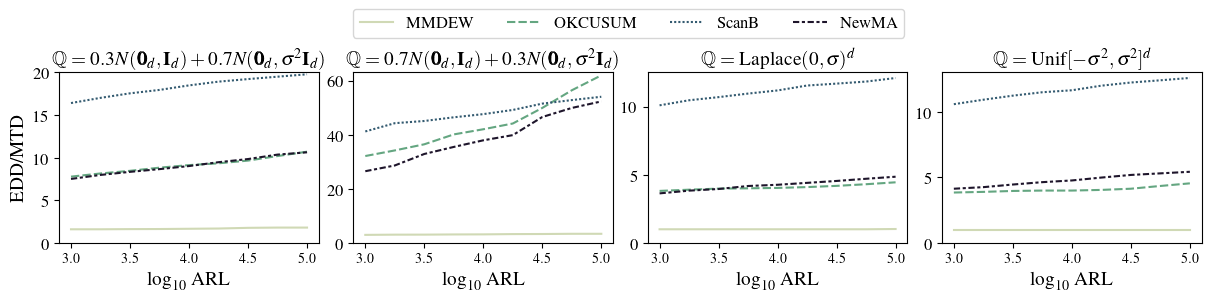

In [5]:
with sns.cubehelix_palette(4, start=0.5, rot=-0.75, gamma=1.2):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,sharex=True,figsize=(12,2.5),layout="constrained")
    sns.lineplot(data=df[df["data"]=="MixedNormal0.3"],x="logARL",y="EDD",hue="algorithm",ax=ax1,style="algorithm")
    sns.lineplot(data=df[df["data"]=="MixedNormal0.7"],x="logARL",y="EDD",hue="algorithm",ax=ax2,style="algorithm")
    sns.lineplot(data=df[df["data"]=="Laplace"],x="logARL",y="EDD",hue="algorithm",ax=ax3,style="algorithm")
    sns.lineplot(data=df[df["data"]=="Uniform"],x="logARL",y="EDD",hue="algorithm",ax=ax4,style="algorithm")

    Line, Label = ax1.get_legend_handles_labels()

    #ax1.set_yscale("log")
    ax1.set_title(r"$\mathbb Q = 0.3N(\bm 0_d,\textbf{I}_d)+0.7N(\bm 0_d,\sigma^2\textbf{I}_d)$")
    ax2.set_title(r"$\mathbb Q = 0.7N(\bm 0_d,\textbf{I}_d)+0.3N(\bm 0_d,\sigma^2\textbf{I}_d)$")
    ax3.set_title(r"$\mathbb Q = \mathrm{Laplace}(0,\sigma)^d$")
    ax4.set_title(r"$\mathbb Q = \mathrm{Unif}[-\sigma^2,\sigma^2]^d$")
    for ax in [ax1,ax2,ax3,ax4]:
        ax.get_legend().remove()
        ax.set_xlabel("$\\log_{10}$ ARL")

    for ax in [ax2,ax3,ax4]:
        ax.set_ylabel("")
    ax1.set_ylabel("EDD/MTD")

    ax1.set_ylim((-0.01,20))
    ax2.set_ylim((-0.01,63))
    ax3.set_ylim((-0.01,12.5))
    ax4.set_ylim((-0.01,13))

    #fig.text(0.151,-0.1,"(a)",fontsize=16)
    #fig.text(0.151+.241,-0.1,"(b)",fontsize=16)
    #fig.text(0.151+.241+.2413,-0.1,"(c)",fontsize=16)
    #fig.text(0.151+.241+.241+.2405,-0.1,"(d)",fontsize=16)
    fig.legend(Line, Label, loc="upper center", bbox_to_anchor=(0.519, 1.17), ncol=4)
    plt.savefig("../../mmdew-article/fig/synth-edd-vs-arl.pdf", bbox_inches="tight", pad_inches=0)